## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, I'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow me along with the preprocessing steps of this case study !

Loading the necessary packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something I would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Loading the diabetes data

In [4]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Starting by reviewing the data info.

In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Applying the describe function to the data.

In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Currently, the missing values in the dataset are represented as zeros. Replacing the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .

In [8]:
nan_col_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'];
diabetes_data[nan_col_zero] = diabetes_data[nan_col_zero].replace(0, np.nan)

In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Plotting histograms of each column.

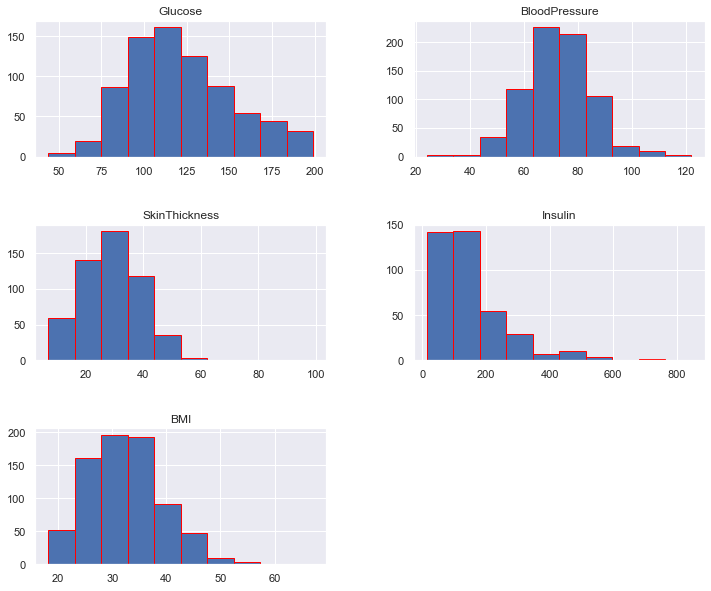

In [12]:
diabetes_data[nan_col_zero].hist(figsize=(12,10), edgecolor='red')
plt.subplots_adjust(hspace=0.5);

#### Replacing the zeros with mean and median values.

In [13]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

Plotting histograms of each column after replacing nan.

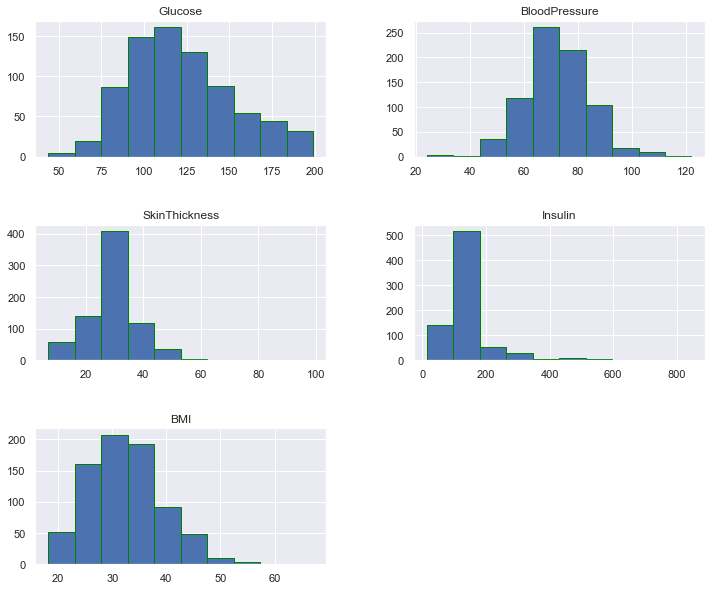

In [14]:
diabetes_data[nan_col_zero].hist(figsize=(12,10), edgecolor='green')
plt.subplots_adjust(hspace=0.5);

#### Plotting the correlation matrix heatmap

Correlation between various features


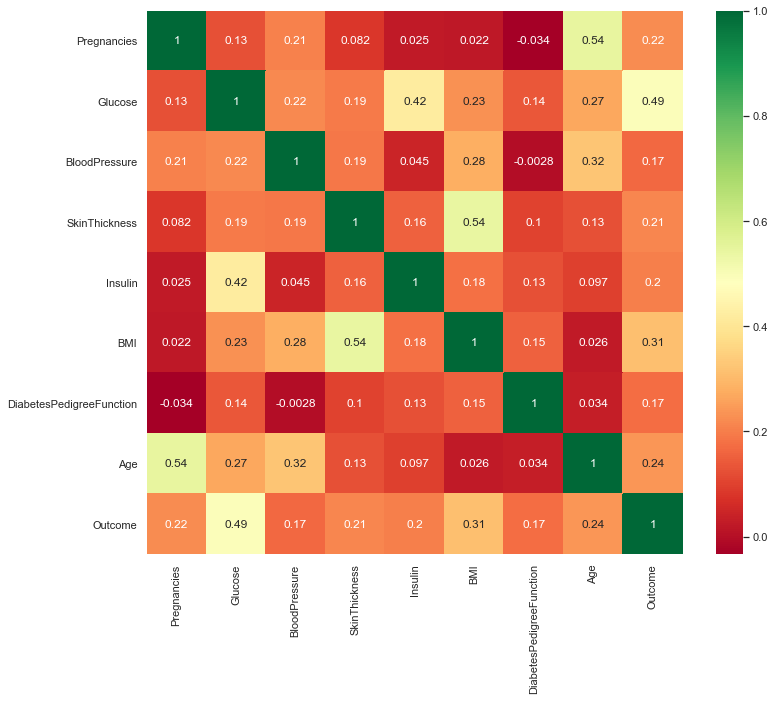

In [16]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')

Defining the `y` variable as the `Outcome` column.

In [17]:
diabetes_data.columns.unique()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[features]
y = diabetes_data.Outcome

Creating a 70/30 train and test split.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Using Sklearn, I will standarize the magnitude of the features by scaling the values.

Note: It's important not to forget to fit() the scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while I standardize my data.

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, I am going to apply the KNearestNeighbor classifier to classify the data.

In [24]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Printing the train and test scores for each iteration.

In [25]:
len(train_scores)

9

In [26]:
score_pairs = pd.DataFrame(zip(train_scores, test_scores), columns=['train_score', 'test_score'], index=np.arange(1, len(train_scores) + 1))
score_pairs

,train_score,test_score
1,1.000000,0.666667
2,0.851024,0.670996
3,0.854749,0.670996
4,0.841713,0.692641
5,0.839851,0.701299
6,0.823091,0.683983
7,0.834264,0.731602
8,0.821229,0.735931
9,0.826816,0.731602


Identifying the number of neighbors that resulted in the max score in the training dataset.

In [28]:
#let's use Series.idxmax() to return the row label of the max train_score:
print(score_pairs['train_score'].idxmax(), ": is the number of neighbors that resulted in the max score:", score_pairs['train_score'].max(), "in the training dataset")

1 : is the number of neighbors that resulted in the max score: 1.0 in the training dataset


Identifying the number of neighbors that resulted in the max score in the testing dataset.

In [29]:
#let's use Series.idxmax() to return the row label of the max test_score:
#score_pairs['test_score'].idxmax()
print(score_pairs['test_score'].idxmax(), ": is the number of neighbors that resulted in the max score:", score_pairs['test_score'].max(), "in the testing dataset")

8 : is the number of neighbors that resulted in the max score: 0.7359307359307359 in the testing dataset


Plotting the train and test model performance by number of neighbors.

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Performance')

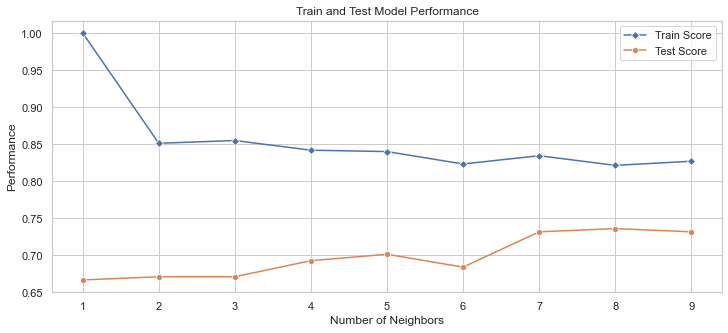

In [30]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
p = sns.lineplot(range(1,10),train_scores,marker='D',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')
plt.title('Train and Test Model Performance')
plt.xlabel('Number of Neighbors')
plt.ylabel('Performance')

Fitting and scoring the best number of neighbors based on the plot.

In [31]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
y_pred = knn.predict(X_test)

print('KNeighborsClassifier: confusion_matrix')
print(pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

KNeighborsClassifier: confusion_matrix
Predicted    0   1  All
True                   
0          126  25  151
1           36  44   80
All        162  69  231


Plotting the confusion matrix for the model fit above.

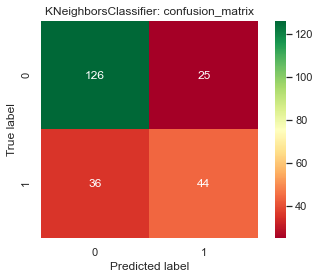

In [34]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='RdYlGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('KNeighborsClassifier: confusion_matrix');

Printing the classification report.

In [35]:
print("KNeighborsClassifier")
print("Accuracy: {:0.5f}".format(accuracy_score(y_test,y_pred) *100), "%")
print('=='*30)
print("KNeighborsClassifier: classification report")
print(classification_report(y_test, y_pred, digits=6))

KNeighborsClassifier
Accuracy: 73.59307 %
KNeighborsClassifier: classification report
              precision    recall  f1-score   support

           0   0.777778  0.834437  0.805112       151
           1   0.637681  0.550000  0.590604        80

    accuracy                       0.735931       231
   macro avg   0.707729  0.692219  0.697858       231
weighted avg   0.729259  0.735931  0.730823       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### I will run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and I will apply cross validation with five folds to score each possible value of n_neighbors.

In [37]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Printing the best score and best parameter for n_neighbors.

In [38]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

Now, following the KNN example, appling this grid search method to find the optimal number of estimators in a Randon Forest model.


In [41]:
param_grid = {'n_estimators':np.arange(1, 201)} #RandomForest n_estimators default is 100 so let's choose 1 to 200
rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 1

In [42]:
print("Best Score: {:0.4f}".format(rf_cv.best_score_))
print("Best Parameters: {}".format(rf_cv.best_params_))

Best Score: 0.7761
Best Parameters: {'n_estimators': 130}
